# 전국 코로나 19

In [3]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
key_fd = open('./keys/gov_data_api_key.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

In [60]:
# datetime객체에서 문자열로 전처리해줘야 받아옴
start_date = '20201121'
end_date = '20201121'

In [61]:
corona_url = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson"
url = f"{corona_url}?serviceKey={govapi_key}&pageNo=1&numOfRows=1&startCreateDt={start_date}&endCreateDt={end_date}"

In [62]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')

In [63]:
# 한 번 요청할 때 들어오는 결과 수
totalCount = soup.select_one('totalCount').text
totalCount

'19'

In [156]:
from datetime import datetime
from dateutil.parser import parse

In [160]:
date_list_tmp = soup.select('createDt')
date_list = []
for date in date_list_tmp:
    date_list.append(parse(date.text).date())
    # date_list.append(int(date.text.split(' ')[0].replace('-','')))
# date_list

In [94]:
# 도시 리스트
city_list_tmp = soup.select('gubun')
city_list = []
for city in city_list_tmp:
    city_list.append(city.text)
city_list

['검역',
 '제주',
 '경남',
 '경북',
 '전남',
 '전북',
 '충남',
 '충북',
 '강원',
 '경기',
 '세종',
 '울산',
 '대전',
 '광주',
 '인천',
 '대구',
 '부산',
 '서울',
 '합계']

In [97]:
# 일일 확진자 발생 수
posi_list_tmp = soup.select('incDec')
posi_list = []
for posi in posi_list_tmp:
    posi_list.append(int(posi.text))
posi_list

[9, 0, 11, 8, 19, 14, 21, 1, 15, 93, 0, 1, 1, 7, 22, 1, 7, 156, 386]

In [114]:
# # 10만명 당 확진자 발생 수
# rate_list_tmp = soup.select('qurRate')
# rate_list = []
# for rate in rate_list_tmp:
#     try:
#         rate_list.append(float(rate.text))
#     except:
#         rate_list.append(float(0))
# rate_list 

## 날짜 Series (3월 2일부터)

In [100]:
from datetime import datetime, timedelta
# 오늘 날짜
today = datetime.today()
march_2nd = datetime(2020,3,2)

# 날짜끼리의 사칙연산은 timedelta 클래스로 return됨, where properties such as days, seconds are available.
elapsed_count = (today - march_2nd).days
elapsed_count

277

In [101]:
elapsed_series = pd.date_range(march_2nd, periods= elapsed_count)
elapsed_series

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11',
               ...
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03'],
              dtype='datetime64[ns]', length=277, freq='D')

In [102]:
# 반복문으로 쿼리 넣을 때를 위해 문자열로 바꾸기
elapsed_series[0].isoformat().split('T')[0].replace('-','')

'20200302'

## 데이터프레임 만들기

In [116]:
tmp = pd.DataFrame({
    '일자':date_list,
    '지역':city_list,
    '확진자':posi_list
})
tmp

,일자,지역,확진자,10만명당 비율
0,20201121,검역,9,0.00
1,20201121,제주,0,9.69
2,20201121,경남,11,13.60
3,20201121,경북,8,62.23
4,20201121,전남,19,18.23
5,20201121,전북,14,11.45
6,20201121,충남,21,36.23
7,20201121,충북,1,14.07
8,20201121,강원,15,31.87
9,20201121,경기,93,48.05


In [117]:
tmp = pd.pivot_table(data = tmp,
                     index = '지역',
                     columns = '일자',
                     values = '확진자')
tmp

일자,20201121
지역,
강원,15
검역,9
경기,93
경남,11
경북,8
광주,7
대구,1
대전,1
부산,7


## 10일치 데이터 가져와보기

In [138]:
tmp_elapsed_10 = pd.date_range(march_2nd, periods= 10)
tmp_elapsed_10

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11'],
              dtype='datetime64[ns]', freq='D')

In [120]:
# 현재 날짜로부터 9일 뒤, 즉 10일 째 되는 날
march_11rd = march_2nd + timedelta(days=9) 
march_11rd

datetime.datetime(2020, 3, 12, 0, 0)

In [121]:
txt_march_2nd = march_2nd.isoformat().split('T')[0].replace('-','')
txt_march_11rd = march_11rd.isoformat().split('T')[0].replace('-','')

In [161]:
tmp_url_10 = f"{corona_url}?serviceKey={govapi_key}&pageNo=1&numOfRows=1&startCreateDt={txt_march_2nd}&endCreateDt={txt_march_11rd}"

In [162]:
result = requests.get(tmp_url_10)
soup = BeautifulSoup(result.text, 'xml')

In [168]:
# 날짜 리스트
date_list_tmp = soup.select('createDt')
date_list = []
for date in date_list_tmp:
    date_list.append(parse(date.text).date())
    # date_list.append(int(date.text.split(' ')[0].replace('-','')))

# 도시 리스트
city_list_tmp = soup.select('gubun')
city_list = []
for city in city_list_tmp:
    city_list.append(city.text)
# 일일 확진자 발생 수
posi_list_tmp = soup.select('incDec')
posi_list = []
for posi in posi_list_tmp:
    posi_list.append(int(posi.text))

In [169]:
tmp_10 = pd.DataFrame({
    '일자':date_list,
    '지역':city_list,
    '확진자':posi_list
})
tmp_10 = pd.pivot_table(data = tmp_10,
                     index = '일자',
                     columns = '지역',
                     values = '확진자')
del tmp_10['검역']
tmp_10 = tmp_10.astype(int)
tmp_10

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,합계
일자,,,,,,,,,,,,,,,,,,
2020-03-02,8,7,4,67,0,469,0,3,10,0,3,0,0,1,0,13,1,586
2020-03-04,1,7,1,89,2,405,1,3,1,0,3,2,0,0,0,1,0,516
2020-03-05,2,9,9,87,1,321,1,-1,4,0,0,0,-1,0,1,4,1,438
2020-03-06,2,10,3,123,-1,367,2,3,2,0,0,0,0,0,0,4,3,518
2020-03-07,1,10,5,65,0,390,0,1,3,1,0,0,0,0,0,2,5,483
2020-03-08,1,11,1,32,0,297,0,1,12,1,1,0,0,0,0,6,4,367
2020-03-09,1,11,0,26,2,190,1,-1,10,3,0,0,0,0,0,4,1,248
2020-03-10,0,11,0,10,0,92,-1,0,11,2,0,4,0,0,0,2,0,131
2020-03-11,1,12,1,18,0,131,0,2,52,2,1,12,0,0,0,8,2,242


## 전체 날짜 가져오기

In [170]:
txt_today = datetime.today().isoformat().split('T')[0].replace('-','')
txt_march_2nd = datetime(2020,3,2).isoformat().split('T')[0].replace('-','')

In [171]:
total_url = f"{corona_url}?serviceKey={govapi_key}&pageNo=1&numOfRows=1&startCreateDt={txt_march_2nd}&endCreateDt={txt_today}"

In [172]:
result = requests.get(total_url)
soup = BeautifulSoup(result.text, 'xml')

In [173]:
# 날짜 리스트
date_list_tmp = soup.select('createDt')
total_date_list = []
for date in date_list_tmp:
    total_date_list.append(parse(date.text).date())

# 도시 리스트
city_list_tmp = soup.select('gubun')
total_city_list = []
for city in city_list_tmp:
    total_city_list.append(city.text)
# 일일 확진자 발생 수
posi_list_tmp = soup.select('incDec')
total_posi_list = []
for posi in posi_list_tmp:
    total_posi_list.append(int(posi.text))

In [217]:
korea = pd.DataFrame({
    '일자':total_date_list,
    '지역':total_city_list,
    '확진자':total_posi_list
})
korea = pd.pivot_table(data = korea,
                     index = '지역',
                     columns = '일자',
                     values = '확진자',
                     fill_value = 0)
# del korea['검역']
# del korea['합계']
korea = korea.drop(['검역','합계'])

korea = korea.astype(int)
korea

일자,2020-03-02,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,...,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04
지역,,,,,,,,,,,,,,,,,,,,,
강원,8,1,2,2,1,1,1,0,1,0,...,13,8,9,33,19,8,9,12,8,3
경기,7,7,9,10,10,11,11,11,12,3,...,82,183,117,126,97,77,96,144,141,160
경남,4,1,9,3,5,1,0,0,1,1,...,11,45,39,14,15,20,11,7,13,16
경북,67,89,87,123,65,32,26,10,18,8,...,3,2,3,5,11,4,11,5,11,9
광주,0,2,1,-1,0,0,2,0,0,0,...,14,14,13,16,8,13,22,10,3,1
대구,469,405,321,367,390,297,190,92,131,73,...,5,1,0,1,3,4,11,4,3,6
대전,0,1,1,2,0,0,1,-1,0,2,...,4,1,5,13,6,5,10,5,7,21
부산,3,3,-1,3,1,1,-1,0,2,1,...,18,22,24,28,22,52,31,32,15,31
서울,10,1,4,2,3,12,10,11,52,19,...,142,213,204,178,154,159,155,193,262,295


In [4]:
# korea.to_csv('./result/전국 코로나 현황.csv', sep=',', encoding='utf8')
korea = pd.read_csv('./result/전국 코로나 현황.csv', sep=',', encoding='utf8')
korea.head(1)

,Unnamed: 0,지역,2020-03-02,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04
0,0,강원,8,1,2,2,1,1,1,0,...,13,8,9,33,19,8,9,12,8,3


In [5]:
del korea['Unnamed: 0']
korea.set_index('지역',inplace=True)

# 시각화

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
# 그래프 크기 고정
plt.rcParams['figure.figsize'] = [15, 15]

font1 = {'family': 'Malgun Gothic', 'size': 24, 
         'color':  'Green'}
font2 = {'family': 'Malgun Gothic', 'size': 20, 'weight': 'bold',
         'color':  'blue'}
font3 = {'family': 'Malgun Gothic', 'size': 18, 
         'color':  'Green'}

## 지역별 총계

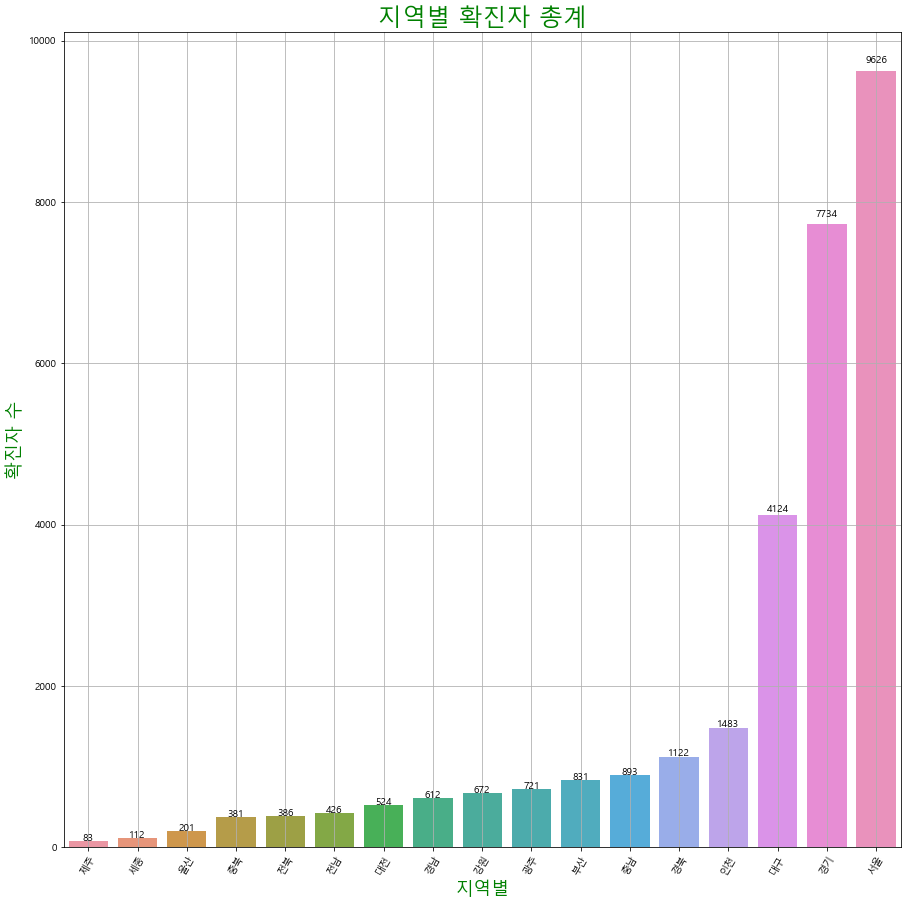

In [28]:
total = korea.copy()
total['지역별 총계'] = total.apply(lambda r: r.sum() ,axis = 1)
total_sort = total.sort_values(by = '지역별 총계', ascending = True)

ax = sns.barplot(data = total_sort,
            x = total_sort.index,
            y = '지역별 총계')
    
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(p.get_height()), (left+width/2 , height*1.01), ha = 'center')

plt.title('지역별 확진자 총계', fontdict = font1)
plt.xlabel('지역별', fontdict=font3)
plt.ylabel('확진자 수', fontdict=font3)
plt.grid()
plt.xticks(rotation=60)
plt.show()



## 최근 3개월간 총계

In [8]:
korea_T = korea.T
korea_T.index = pd.to_datetime(korea_T.index, errors='raise')
resample_month = korea_T.resample('M').sum()
resample_month.index = ['3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
resample_month.head()

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
3월,24,389,36,682,9,3552,22,32,362,45,22,57,4,7,6,60,34
4월,17,200,21,65,10,168,4,18,183,0,4,29,6,5,4,15,1
5월,4,164,6,14,2,31,6,10,228,1,9,113,4,3,2,3,15
6월,8,367,11,10,12,23,71,7,452,3,3,135,5,6,4,22,5
7월,9,339,25,12,160,34,49,17,288,0,4,42,14,12,7,23,9


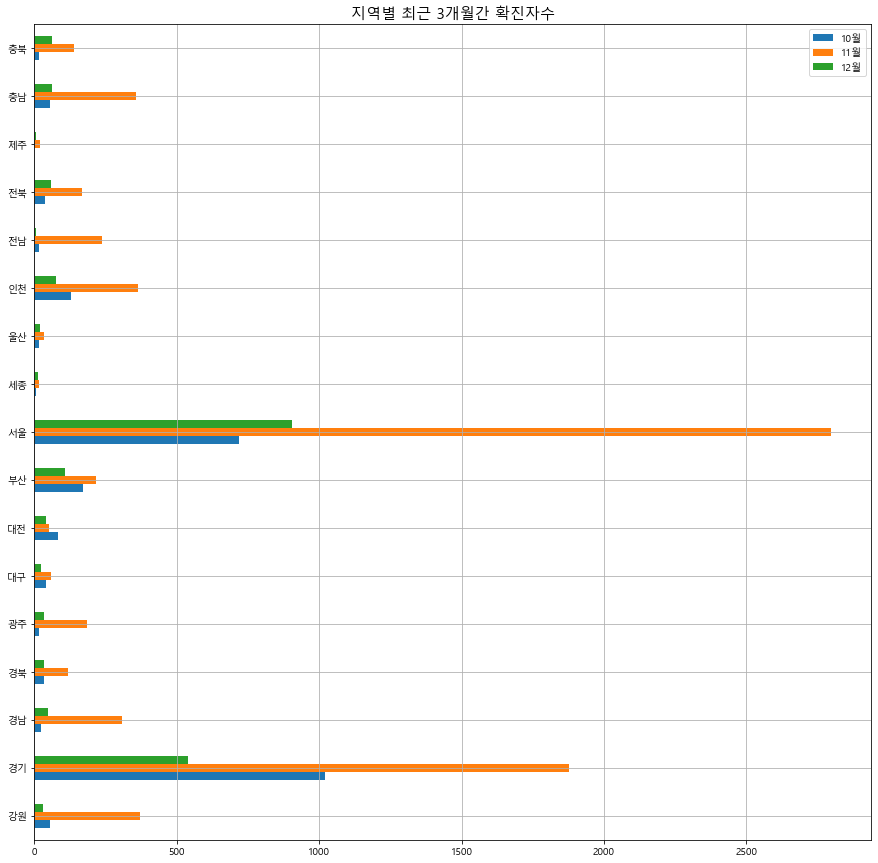

In [29]:
recent = resample_month.T.copy()

recent[['10월','11월','12월']].plot(kind='barh', grid=True)
plt.title('지역별 최근 3개월간 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

## 주별 총계

In [10]:
week = korea_T.copy()

week.index = pd.to_datetime(week.index, errors='raise')
resample_week = week.resample('W').sum()

resample_week['주별 총계'] = resample_week.apply(lambda r: r.sum(), axis = 1)
resample_week.reset_index(inplace=True)
resample_week.head()

지역,index,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,주별 총계
0,2020-03-08,15,54,23,463,2,2249,4,10,32,2,7,2,-1,1,1,30,14,2908
1,2020-03-15,2,70,2,76,3,650,4,9,127,36,4,21,0,0,0,17,7,1028
2,2020-03-22,1,126,3,97,3,356,2,2,77,2,8,10,2,3,0,5,4,701
3,2020-03-29,4,111,6,33,1,223,10,9,86,5,3,18,3,2,4,7,6,531
4,2020-04-05,11,124,15,27,7,158,3,5,142,0,1,21,6,4,4,8,4,540


In [11]:
resample_week.index.to_numpy()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

In [12]:
resample_week['주차'] = resample_week.apply(lambda r: r['index'].strftime('%m-%d'), axis=1)

In [13]:
resample_week['주차'][:10] 

0    03-08
1    03-15
2    03-22
3    03-29
4    04-05
5    04-12
6    04-19
7    04-26
8    05-03
9    05-10
Name: 주차, dtype: object

In [14]:
resample_week.set_index('주차',inplace=True)
del resample_week['index']

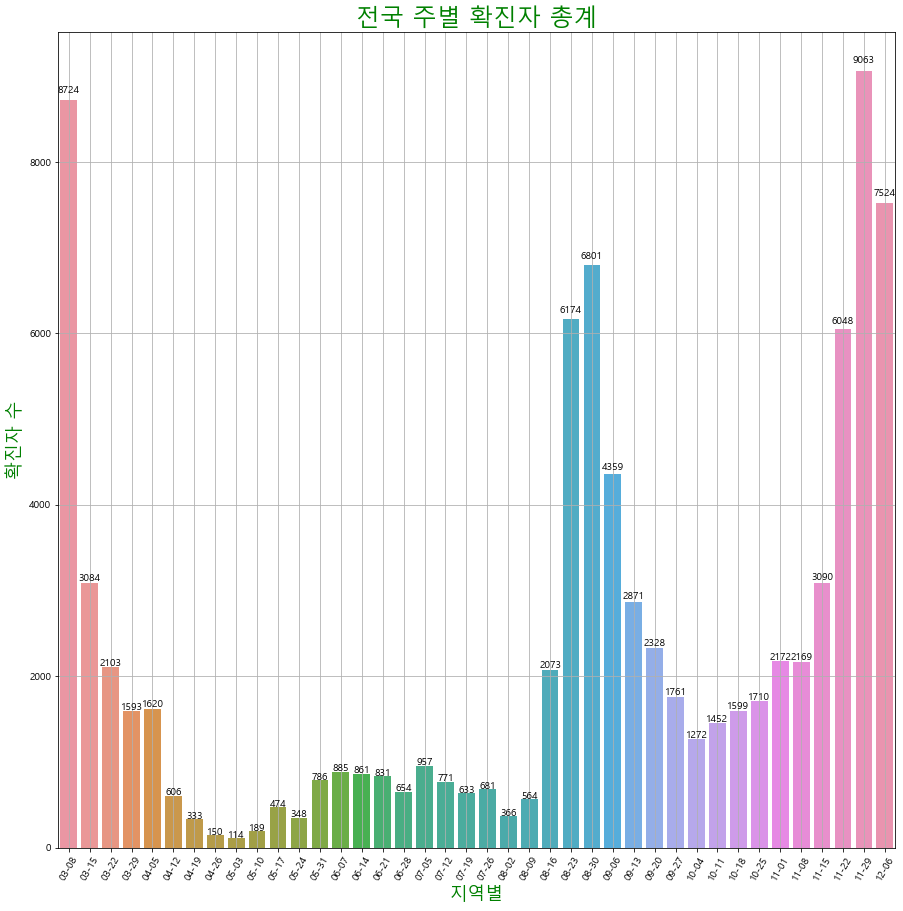

In [30]:
resample_week['주별 총계'] = resample_week.apply(lambda r: r.sum(), axis = 1)

ax = sns.barplot(data = resample_week,
            x = resample_week.index,
            y = '주별 총계')
    
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(p.get_height()), (left+width/2 , height*1.01), ha = 'center')

plt.title('전국 주별 확진자 총계', fontdict = font1)
plt.xlabel('지역별', fontdict=font3)
plt.ylabel('확진자 수', fontdict=font3)
plt.grid()
plt.xticks(rotation=60)
plt.show()


## 인구수 별 확진자인원

In [16]:
total.head(1)

,2020-03-02,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,...,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,지역별 총계
지역,,,,,,,,,,,,,,,,,,,,,
강원,8,1,2,2,1,1,1,0,1,0,...,8,9,33,19,8,9,12,8,3,672


In [17]:
pop = pd.read_excel('./source/전국 도별 인구수.xlsx', header = 2, usecols = [1, 2, 3,4, 5, 6, 7], thousands =',')
pop = pop.drop(0)
pop.reset_index(inplace=True)
del pop['index']
pop

,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시,9679771,4412343,2.19,4708321,4971450,0.95
1,부산광역시,3395514,1527721,2.22,1663055,1732459,0.96
2,대구광역시,2421859,1054637,2.30,1195081,1226778,0.97
3,인천광역시,2942307,1264300,2.33,1473795,1468512,1.00
4,광주광역시,1451993,632264,2.30,718370,733623,0.98
5,대전광역시,1465893,651488,2.25,731701,734192,1.00
6,울산광역시,1137345,476112,2.39,584305,553040,1.06
7,세종특별자치시,353430,142912,2.47,176336,177094,1.00
8,경기도,13413459,5658580,2.37,6748061,6665398,1.01
9,강원도,1542374,734819,2.10,776079,766295,1.01


- 고유 ID

In [18]:
len(pop.index)

17

In [19]:
pop['행정기관'] = pop['행정기관'].str.strip()

In [20]:
ID = [None] * len(pop.index)

for i in pop['행정기관'].index:
    if pop['행정기관'][i][-3:] in ['광역시','특별시','자치시','자치도']:
        ID[i] = pop['행정기관'][i][:2]
    elif len(pop['행정기관'][i]) == 3:
        ID[i] = pop['행정기관'][i][:-1]
    else:
        ID[i] = pop['행정기관'][i][::2]

ID

['서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

In [21]:
pop['지역'] = ID

In [22]:
pop.to_csv('./result/전국 도별 인구수.csv',sep=',',encoding='utf8')

In [23]:
total_pop = pd.merge(total, pop, on='지역')
total_pop.head(1)

,지역,2020-03-02,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-12-03,2020-12-04,지역별 총계,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,강원,8,1,2,2,1,1,1,0,1,...,8,3,672,강원도,1542374,734819,2.1,776079,766295,1.01


In [24]:
total_pop['인구대비 확진자 비율'] = total_pop['지역별 총계']/total_pop['총인구수'] * 100

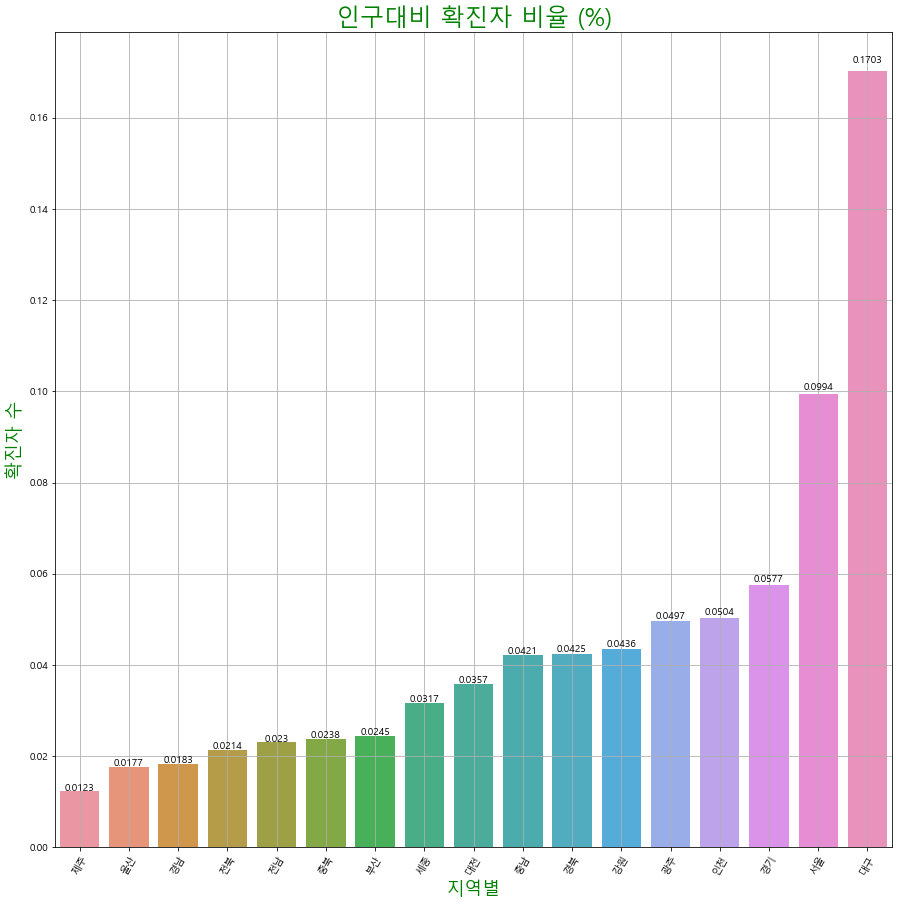

In [31]:
total_pop_1 = total_pop.copy()

total_pop_1 = total_pop_1.sort_values(by = '인구대비 확진자 비율', ascending = True)

ax = sns.barplot(data = total_pop_1,
            x = total_pop_1.지역,
            y = '인구대비 확진자 비율')
    
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(round(float(p.get_height()),4), (left+width/2 , height*1.01), ha = 'center')

plt.title('인구대비 확진자 비율 (%)', fontdict = font1)
plt.xlabel('지역별', fontdict=font3)
plt.ylabel('확진자 수', fontdict=font3)
plt.grid()
plt.xticks(rotation=60)
plt.show()



## 경도, 위도 추가

In [33]:
total.reset_index(inplace=True)

In [63]:
total_foilum = total[['지역','지역별 총계']].copy()

In [64]:
key_kakao = open('./keys/kakaomapkey.txt', mode='r', encoding='utf8')
kmap_key = key_kakao.read(100)
key_kakao.close()

In [65]:
from urllib.parse import quote
addr = '광주'

kakao_url = 'https://dapi.kakao.com/v2/local/search/address.json?query='+quote(addr)

# KakaoAK 뒤 space하나 조심!
result = requests.get(kakao_url, headers={'Authorization':'KakaoAK '+kmap_key}).json() 

In [66]:
result

{'documents': [{'address': {'address_name': '경기 광주시',
    'b_code': '4161000000',
    'h_code': '4161000000',
    'main_address_no': '',
    'mountain_yn': 'N',
    'region_1depth_name': '경기',
    'region_2depth_name': '광주시',
    'region_3depth_h_name': '',
    'region_3depth_name': '',
    'sub_address_no': '',
    'x': '127.255138719721',
    'y': '37.4293941934866'},
   'address_name': '경기 광주시',
   'address_type': 'REGION',
   'road_address': None,
   'x': '127.255138719721',
   'y': '37.4293941934866'},
  {'address': {'address_name': '광주광역시',
    'b_code': '2900000000',
    'h_code': '2900000000',
    'main_address_no': '',
    'mountain_yn': 'N',
    'region_1depth_name': '광주광역시',
    'region_2depth_name': '',
    'region_3depth_h_name': '',
    'region_3depth_name': '',
    'sub_address_no': '',
    'x': '126.851629955742',
    'y': '35.1601037626662'},
   'address_name': '광주광역시',
   'address_type': 'REGION',
   'road_address': None,
   'x': '126.851629955742',
   'y': '35.160103

In [67]:
result['documents'][1]

{'address': {'address_name': '광주광역시',
  'b_code': '2900000000',
  'h_code': '2900000000',
  'main_address_no': '',
  'mountain_yn': 'N',
  'region_1depth_name': '광주광역시',
  'region_2depth_name': '',
  'region_3depth_h_name': '',
  'region_3depth_name': '',
  'sub_address_no': '',
  'x': '126.851629955742',
  'y': '35.1601037626662'},
 'address_name': '광주광역시',
 'address_type': 'REGION',
 'road_address': None,
 'x': '126.851629955742',
 'y': '35.1601037626662'}

In [68]:
total_foilum.head()

,지역,지역별 총계
0,강원,672
1,경기,7734
2,경남,612
3,경북,1122
4,광주,721


In [80]:
total_foilum['지역']

0     강원
1     경기
2     경남
3     경북
4     광주
5     대구
6     대전
7     부산
8     서울
9     세종
10    울산
11    인천
12    전남
13    전북
14    제주
15    충남
16    충북
Name: 지역, dtype: object

In [70]:
total_foilum.index.to_numpy()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [81]:
lat_list = [] ; lng_list = []

for index in total_foilum.index:
    addr = total_foilum['지역'][index]
    kakao_url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote(addr)
    result = requests.get(kakao_url, headers={'Authorization':'KakaoAK '+kmap_key}).json()
    if addr == '광주':
        # print(addr, 0)
        lat_list.append(float(result['documents'][1]['y']))
        lng_list.append(float(result['documents'][1]['x']))
    else:
        # print(addr, 1)
        lat_list.append(float(result['documents'][0]['y']))
        lng_list.append(float(result['documents'][0]['x']))

total_foilum['lat'] = lat_list
total_foilum['lng'] = lng_list

0 강원 2
1 경기 2
2 경남 2
3 경북 2
4 광주 2
5 대구 2
6 대전 2
7 부산 2
8 서울 2
9 세종 2
10 울산 2
11 인천 2
12 전남 2
13 전북 2
14 제주 2
15 충남 2
16 충북 2


In [82]:
total_foilum.head()

,지역,지역별 총계,lat,lng
0,강원,672,37.885326,127.729829
1,경기,7734,37.274977,127.008930
2,경남,612,35.237774,128.691897
3,경북,1122,36.575996,128.505799
4,광주,721,35.160104,126.851630


In [73]:
import folium

- 전라도 광주가 경기도 광주로 잘못 들어갔었음, 수정 완료

In [84]:
mapping = folium.Map(
    location= [total_foilum['lat'].mean(), total_foilum['lng'].mean()], zoom_start=7)

for i in total_foilum.index:
    folium.Marker(
    location=[total_foilum['lat'][i], total_foilum['lng'][i]],
    # popup은 눌러야 나오는 것
    popup = total_foilum['지역'][i],
    # tooltip은 마우스오버만 해도 나오는 것
    tooltip = total_foilum['지역별 총계'][i],
    icon=folium.Icon(color='red', icon='remove')
).add_to(mapping)
    folium.CircleMarker([total_foilum['lat'][i], total_foilum['lng'][i]],
                        radius = total_foilum['지역별 총계'][i]/ 200,
                        color='#810640', fill_color='pink').add_to(mapping)

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>전국 지역별 확진자 총합</b></h3>
             '''.format(loc)   
mapping.get_root().html.add_child(folium.Element(title_html))


mapping

## 인구비율 당 확진자 수

In [87]:
total_pop.head(1)

,지역,2020-03-02,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-12-04,지역별 총계,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,인구대비 확진자 비율
0,강원,8,1,2,2,1,1,1,0,1,...,3,672,강원도,1542374,734819,2.1,776079,766295,1.01,0.043569


In [93]:
total_foilum.head(1)

,지역,지역별 총계,lat,lng
0,강원,672,37.885326,127.729829


In [95]:
total_foilum_pop = pd.merge(total_foilum, total_pop[['지역','인구대비 확진자 비율']], on = '지역')
total_foilum_pop['인구대비 확진자 비율'] = total_foilum_pop.apply(lambda r: round(r['인구대비 확진자 비율'],4) , axis = 1)
total_foilum_pop.head(3)

,지역,지역별 총계,lat,lng,인구대비 확진자 비율
0,강원,672,37.885326,127.729829,0.0436
1,경기,7734,37.274977,127.008930,0.0577
2,경남,612,35.237774,128.691897,0.0183


In [100]:
mapping = folium.Map(
    location= [total_foilum_pop['lat'].mean(), total_foilum_pop['lng'].mean()], zoom_start=7)

for i in total_foilum_pop.index:
    folium.Marker(
    location=[total_foilum_pop['lat'][i], total_foilum_pop['lng'][i]],
    # popup은 눌러야 나오는 것
    popup = total_foilum_pop['지역'][i],
    # tooltip은 마우스오버만 해도 나오는 것
    tooltip = total_foilum_pop['인구대비 확진자 비율'][i],
    icon=folium.Icon(color='purple', icon='remove')
).add_to(mapping)
    folium.CircleMarker([total_foilum_pop['lat'][i], total_foilum_pop['lng'][i]],
                        radius = total_foilum_pop['인구대비 확진자 비율'][i] * 200,
                        color='orange', fill_color='rgb(247 152 89)').add_to(mapping)

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>전국 지역별 인구대비 확진자 비율</b></h3>
             '''.format(loc)   
mapping.get_root().html.add_child(folium.Element(title_html))


mapping